In [1]:
# This is my file.

In [2]:
# Dependencies.
# Data.
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Visualization.
import matplotlib.pyplot as plt
from pandas.plotting import table
import seaborn as sns
import random as rand

# ... More?
# ...

In [3]:
# Read in the clean data from our csv.
filepath = '../data/clean_life_expectancy.csv'

# Make the DataFrame.
df = pd.read_csv(filepath, index_col = 0)

# Preview.
display(df.shape)
display(df.info())
display(df.head())

(1365, 10)

<class 'pandas.core.frame.DataFrame'>
Index: 1365 entries, 0 to 1364
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  1365 non-null   object 
 1   year                     1365 non-null   int64  
 2   life_expectancy          1365 non-null   float64
 3   smoking_deaths           1365 non-null   float64
 4   obesity_deaths           1365 non-null   float64
 5   deaths_by_suicide        1365 non-null   float64
 6   mean_years_of_schooling  1365 non-null   float64
 7   population               1365 non-null   int64  
 8   gdp                      1365 non-null   float64
 9   gov_health_expenditure   1365 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 117.3+ KB


None

,country,year,life_expectancy,smoking_deaths,obesity_deaths,deaths_by_suicide,mean_years_of_schooling,population,gdp,gov_health_expenditure
0,Afghanistan,2002,56.4538,4.484723,109.050644,7.85,1.522516,21000258,1280.4631,1.21
1,Afghanistan,2003,57.3445,4.593383,110.698310,7.72,1.579871,22645136,1292.3335,5.46
2,Afghanistan,2004,57.9436,4.665421,113.260590,7.77,1.637226,23553554,1260.0605,3.60
3,Afghanistan,2005,58.3608,4.708809,115.482414,7.64,1.694581,24411196,1352.3207,3.37
4,Afghanistan,2006,58.6844,4.746228,119.301240,7.56,1.776703,25442946,1366.9932,2.72


In [4]:
# We want to simplify this DataFrame to contain the columns that we will be needing.
# These are: country, year, life_expectancy, smoking_deaths, population.
df = df[['country', 'year', 'life_expectancy', 'smoking_deaths', 'population']]

# Preview.
display(df.shape)
display(df.info())
display(df.head())

(1365, 5)

<class 'pandas.core.frame.DataFrame'>
Index: 1365 entries, 0 to 1364
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          1365 non-null   object 
 1   year             1365 non-null   int64  
 2   life_expectancy  1365 non-null   float64
 3   smoking_deaths   1365 non-null   float64
 4   population       1365 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 64.0+ KB


None

,country,year,life_expectancy,smoking_deaths,population
0,Afghanistan,2002,56.4538,4.484723,21000258
1,Afghanistan,2003,57.3445,4.593383,22645136
2,Afghanistan,2004,57.9436,4.665421,23553554
3,Afghanistan,2005,58.3608,4.708809,24411196
4,Afghanistan,2006,58.6844,4.746228,25442946


In [5]:
# ...
df.groupby('country').agg(['mean', 'median', 'std'])

year                   life_expectancy            \
                             mean  median       std            mean    median   
country                                                                         
Afghanistan           2010.500000  2010.5  5.338539       60.706917  61.13495   
Algeria               2010.500000  2010.5  5.338539       73.851694  73.96575   
Angola                2010.500000  2010.5  5.338539       56.437317  57.16095   
Argentina             2010.500000  2010.5  5.338539       75.902183  76.02995   
Armenia               2010.714286  2011.0  5.915151       73.255157  73.30685   
...                           ...     ...       ...             ...       ...   
Uganda                2010.500000  2010.5  5.338539       57.278650  57.50990   
United Arab Emirates  2015.500000  2015.5  2.449490       79.253450  79.27895   
Uzbekistan            2010.500000  2010.5  5.338539       69.225989  69.44205   
Zambia                2010.500000  2010.5  5.338539       56.303300  57.28495   
Zimbabwe              2014.500000  2014.5  3.027650       57.924240  59.21855   

                               smoking_deaths                       \
                           std           mean     median       std   
country                                                              
Afghanistan           2.264490       5.216688   5.288251  0.456762   
Algeria               1.717862      10.650280  10.603426  0.218150   
Angola                4.711916       5.591321   5.598154  0.094105   
Argentina             0.929325      15.199574  15.266941  0.443975   
Armenia               1.525564      16.109184  16.099052  0.108813   
...                        ...            ...        ...       ...   
Uganda                4.275366       4.034333   4.084155  0.279457   
United Arab Emirates  0.363931      11.391209  11.546614  0.502216   
Uzbekistan            1.504054       7.422734   7.375181  0.398605   
Zambia                5.296183       5.459506   5.715942  0.446552   
Zimbabwe              3.650156       8.401938   8.504893  0.470693   

                        population                            
                              mean      median           std  
country                                                       
Afghanistan           2.930117e+07  28719414.0  5.102265e+06  
Algeria               3.657804e+07  36199948.0  3.555006e+06  
Angola                2.424106e+07  23811658.0  4.706125e+06  
Argentina             4.134101e+07  41310430.0  2.196984e+06  
Armenia               2.949583e+06   2930362.0  9.815561e+04  
...                            ...         ...           ...  
Uganda                3.331422e+07  32818731.0  5.366195e+06  
United Arab Emirates  8.948011e+06   8955587.5  1.909207e+05  
Uzbekistan            2.898801e+07  28835845.0  2.350407e+06  
Zambia                1.416387e+07  14028959.5  2.505300e+06  
Zimbabwe              1.403076e+07  14005347.5  8.678907e+05  

[79 rows x 12 columns]

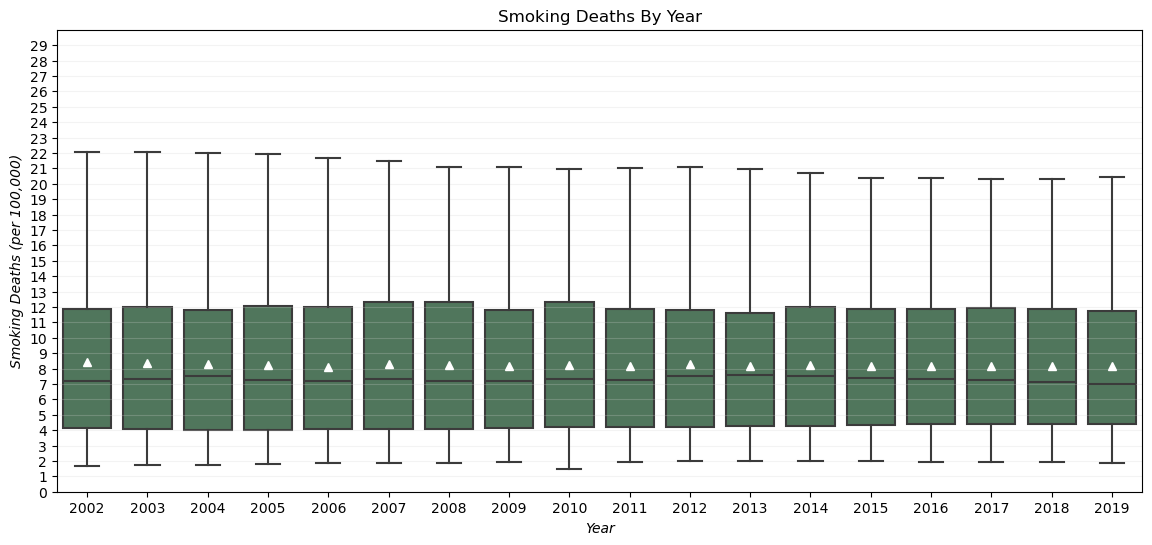

In [6]:
# Box Plot for Smoking Deaths.
# Step 1: data.

# Step 2: canvas.
plt.figure(figsize=(14, 6))

# Step 3: skeleton plot.
sns.boxplot(
    data = df,
    x = 'year',
    y = 'smoking_deaths',
    color = '#4A7C59',
    showmeans = True,
    meanprops = {
        'markerfacecolor': 'white',
        'markeredgecolor': 'white'
    }
)

# Step 4: formatting.
plt.xlabel('Year', fontsize = 10, fontstyle = 'italic')

plt.ylabel('Smoking Deaths (per 100,000)', fontsize = 10, fontstyle = 'italic')
plt.yticks(np.arange(-10, 30, 1))
plt.ylim(0, 30)

plt.title('Smoking Deaths By Year')

plt.grid(axis = 'y', color = 'lightgray', alpha = .25)

# Step 5: save/show.
plt.savefig('dataset_deaths_year.png')
plt.show()

In [7]:
# Leaderboards.
# Combine the entries for each country into a new DataFrame.
mean_df = df.groupby(['country']).smoking_deaths.mean().reset_index()

# Preview.
display(mean_df.shape)
display(mean_df.info())
display(mean_df.head())

(79, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         79 non-null     object 
 1   smoking_deaths  79 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


None

,country,smoking_deaths
0,Afghanistan,5.216688
1,Algeria,10.650280
2,Angola,5.591321
3,Argentina,15.199574
4,Armenia,16.109184


In [8]:
# Save the Table printout as a picture.
# Create a new DataFrame that we will format.
low_df = mean_df.sort_values(by = 'smoking_deaths').head(5).reset_index(drop = True)

# Clean up the numbers.
low_df['smoking_deaths'] = low_df['smoking_deaths'].map('{:,.2f}'.format)

# Rename those columns.
low_df.columns = ['Country', 'Smoking Deaths (per 100,000 people)']
low_df = low_df.set_index('Country')

# Show it.
low_df

# # Make a canvas.
# plt.figure(figsize=(4, .1))

# # Show the table. Hide the frame/axis.
# ax = plt.subplot(111, frame_on=False) 
# ax.xaxis.set_visible(False)  
# ax.yaxis.set_visible(False)  

# table(ax, low_df) 

# # Show/Save it.
# plt.savefig('smoking_deaths_low_5.png')
# plt.show()

,"Smoking Deaths (per 100,000 people)"
Country,
Nigeria,1.94
Niger,1.96
Ethiopia,2.02
Burkina Faso,2.25
Guinea-Bissau,2.44


In [9]:
# Save the Table printout as a picture.
# Create a new DataFrame that we will format.
high_df = mean_df.sort_values(by = 'smoking_deaths', ascending = False).head(5).reset_index(drop = True)

# Clean up the numbers.
high_df['smoking_deaths'] = high_df['smoking_deaths'].map('{:,.2f}'.format)

# Rename those columns.
high_df.columns = ['Country', 'Smoking Deaths (per 100,000 people)']
high_df = high_df.set_index('Country')

# Show it.
high_df

# # Make a canvas.
# plt.figure(figsize=(4, 2))

# # Show the table. Hide the frame/axis.
# ax = plt.subplot(111, frame_on=False) 
# ax.xaxis.set_visible(False)  
# ax.yaxis.set_visible(False)  

# table(ax, high_df) 

# # Show/Save it.
# plt.savefig('smoking_deaths_top_5.png')
# plt.show()

,"Smoking Deaths (per 100,000 people)"
Country,
China,21.04
Nepal,20.42
Philippines,16.65
Armenia,16.11
Myanmar,15.95


In [10]:
highest = [x for x in mean_df.sort_values(by = 'smoking_deaths', ascending = False).head(5).country]
lowest = [x for x in mean_df.sort_values(by = 'smoking_deaths').head(5).country]

# Isolate the highest/lowest countries using loc.
# df.loc[df.country.isin(highest), :]
# df.loc[df.country.isin(lowest), :]

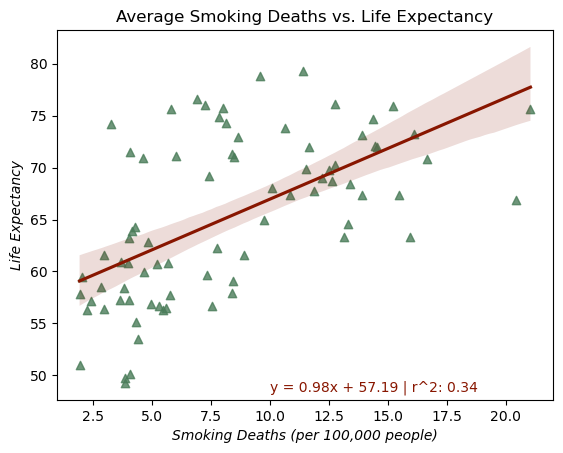

In [11]:
# Regression Plot for Smoking Deaths vs. Life Expectancy of entire dataset.
# Plot it.
p = sns.regplot(
    data = df.groupby('country').mean(),
    y = 'life_expectancy',
    x = 'smoking_deaths',
    marker = '^',
    scatter_kws = {
        'color': '#4A7C59'
    },
    line_kws = {
        'color': '#881600'
    }
)

# Equation of the linregress.
(slope, intercept, r_value, p_value, std_err) = linregress(
    x=df.groupby('country').mean().smoking_deaths,
    y=df.groupby('country').mean().life_expectancy
)
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.text(10, 48.5, line_eq + ' | r^2: ' + str(round(r_value**2, 2)), color = '#881600')

# Formatting.
plt.xlabel('Smoking Deaths (per 100,000 people)', fontsize = 10, fontstyle = 'italic')

plt.ylabel('Life Expectancy', fontsize = 10, fontstyle = 'italic')

plt.title('Average Smoking Deaths vs. Life Expectancy')

# Show/save it.
plt.savefig('world_avgsmoking_lifeexp.png')
plt.show()

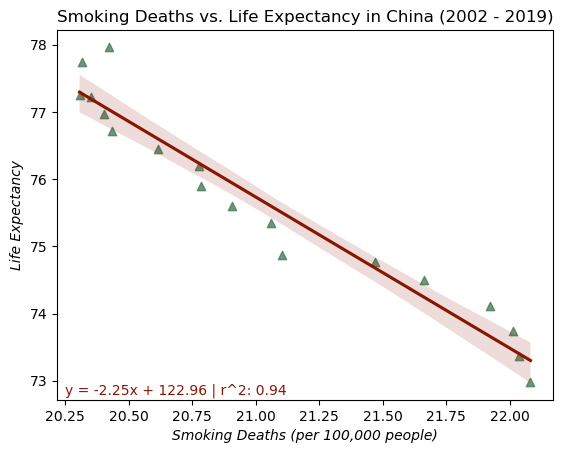

In [12]:
# Let's isolate a single place from each of the leaderboards and examine those.
# We're going to go with China (#1) and Nigeria (#79 | lowest).
# Here's China.
sns.regplot(
    data = df.loc[df.country == "China", :],
    y = 'life_expectancy',
    x = 'smoking_deaths',
    marker = '^',
    scatter_kws = {
        'color': '#4A7C59'
    },
    line_kws = {
        'color': '#881600'
    }
)

# Equation of the linregress.
(slope, intercept, r_value, p_value, std_err) = linregress(
    x = df.loc[df.country == "China", :].smoking_deaths,
    y = df.loc[df.country == "China", :].life_expectancy
)
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.text(20.25, 72.8, line_eq + ' | r^2: ' + str(round(r_value**2, 2)), color = '#881600')

# Formatting.
plt.xlabel('Smoking Deaths (per 100,000 people)', fontsize = 10, fontstyle = 'italic')

plt.ylabel('Life Expectancy', fontsize = 10, fontstyle = 'italic')

plt.title('Smoking Deaths vs. Life Expectancy in China (2002 - 2019)')

# Show/Save.
plt.savefig('china_smoking_lifeexp.png')
plt.show()

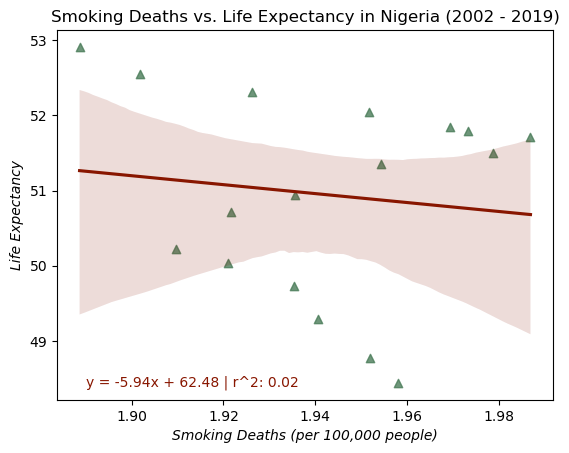

In [13]:
# Nigeria scatter plot.
sns.regplot(
    data = df.loc[df.country == "Nigeria", :],
    y = 'life_expectancy',
    x = 'smoking_deaths',
    marker = '^',
    scatter_kws = {
        'color': '#4A7C59'
    },
    line_kws = {
        'color': '#881600'
    }
)

# Equation of the linregress.
(slope, intercept, r_value, p_value, std_err) = linregress(
    x = df.loc[df.country == "Nigeria", :].smoking_deaths,
    y = df.loc[df.country == "Nigeria", :].life_expectancy
)
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.text(1.89, 48.4, line_eq + ' | r^2: ' + str(round(r_value**2, 2)), color = '#881600')

# Formatting.
plt.xlabel('Smoking Deaths (per 100,000 people)', fontsize = 10, fontstyle = 'italic')

plt.ylabel('Life Expectancy', fontsize = 10, fontstyle = 'italic')

plt.title('Smoking Deaths vs. Life Expectancy in Nigeria (2002 - 2019)')

# Show/Save.
plt.savefig('nigeria_smoking_lifeexp.png')
plt.show()